[*********************100%***********************]  1 of 1 completed


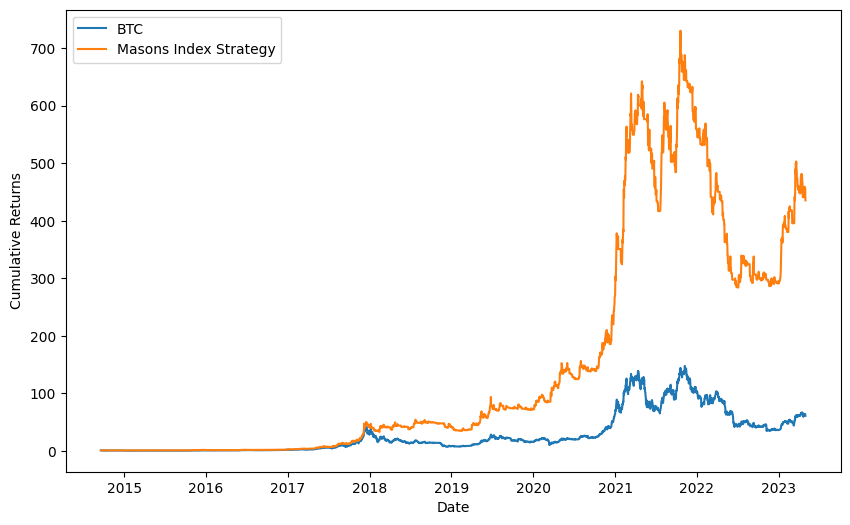

---- WITH THE MASONS ----
Annualized Return: 62.62%
Cumulative Return: 43429.47%
Annualized Volatility: 41.47%
Sharpe Ratio: 1.38
Sortino Ratio: 2.37
Max Drawdown: -61.11%
---- INDEX ----
Annualized Return: 38.97%
Cumulative Return: 6009.66%
Annualized Volatility: 60.28%
Sharpe Ratio: 0.85
Sortino Ratio: 1.24
Max Drawdown: -83.40%


In [19]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import empyrical as ep


# Download historical data for the ETFs
data = yf.download('BTC-USD')['Close']

def masons_index(prices, window=7):
    n = len(prices)
    masons_index = np.zeros(n)
    
    for k in range(window - 1, n):
        utility = 0
        for i in range(window):
            min_value = min(prices[k - i : k + 1])
            max_value = max(prices[k - i : k + 1])
            utility += np.log(prices[k] / max_value) + np.log(prices[k] / min_value)
        
        masons_index[k] = utility / window

    return masons_index

# Calculate the Masons Index for the downloaded data
data_masons_index = masons_index(data)

# Calculate the daily returns of the MSCI World ETF
data_returns = data.pct_change()

# Create a signal based on the Masons Index being positive or negative
masons_signal = pd.Series(data_masons_index > 0, index=data.index)

masons_signal.iloc[:7] = 0  # Set the signal to 0 for the first 252 days

# Apply the strategy by multiplying the daily returns by the Masons signal (shifted by 1 day to avoid lookahead bias)
strategy_returns = data_returns * masons_signal.shift(1)

# Calculate the cumulative returns of the strategy
cumulative_strategy_returns = (1 + strategy_returns).cumprod()

# Plot the MSCI World ETF's cumulative returns and the strategy's cumulative returns
fig, ax = plt.subplots(figsize=(10, 6))

data_cumulative_returns = (1 + data_returns).cumprod()
ax.plot(data_cumulative_returns.index, data_cumulative_returns, label='BTC')
ax.plot(cumulative_strategy_returns.index, cumulative_strategy_returns, label="Masons Index Strategy")
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')

plt.legend()
plt.show()

print("---- WITH THE MASONS ----")

# Fill missing values with zeros
strategy_returns = strategy_returns.fillna(0)
# Annualized return
annualized_return = ep.annual_return(strategy_returns)
print(f"Annualized Return: {annualized_return * 100:.2f}%")
# Cumulative return
cumulative_return = ep.cum_returns_final(strategy_returns)
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
# Annualized volatility
annualized_volatility = ep.annual_volatility(strategy_returns)
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
# Sharpe ratio
sharpe_ratio = ep.sharpe_ratio(strategy_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
# Sortino ratio
sortino_ratio = ep.sortino_ratio(strategy_returns)
print(f"Sortino Ratio: {sortino_ratio:.2f}")
# Max drawdown
max_drawdown = ep.max_drawdown(strategy_returns)
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")

print("---- INDEX ----")

# Fill missing values with zeros
strategy_returns = data_returns.fillna(0)
# Annualized return
annualized_return = ep.annual_return(strategy_returns)
print(f"Annualized Return: {annualized_return * 100:.2f}%")
# Cumulative return
cumulative_return = ep.cum_returns_final(strategy_returns)
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
# Annualized volatility
annualized_volatility = ep.annual_volatility(strategy_returns)
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
# Sharpe ratio
sharpe_ratio = ep.sharpe_ratio(strategy_returns)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
# Sortino ratio
sortino_ratio = ep.sortino_ratio(strategy_returns)
print(f"Sortino Ratio: {sortino_ratio:.2f}")
# Max drawdown
max_drawdown = ep.max_drawdown(strategy_returns)
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")

In [13]:
# Define a range of window values to test
window_values = range(5, 50)

# Initialize variables to store optimal values
best_window = None
best_sharpe_ratio = -np.inf

# Grid search over window values
for window in window_values:
    data_masons_index = masons_index(data, window=window)
    
    masons_signal = pd.Series(data_masons_index > 0, index=data.index)
    masons_signal.iloc[:25] = 0
    
    strategy_returns = data_returns * masons_signal.shift(1)
    strategy_returns = strategy_returns.fillna(0)
    
    sharpe_ratio = ep.sharpe_ratio(strategy_returns)
    
    if sharpe_ratio > best_sharpe_ratio:
        best_sharpe_ratio = sharpe_ratio
        best_window = window

print(f"Optimal Window: {best_window}")
print(f"Best Sharpe Ratio: {best_sharpe_ratio:.2f}")


Optimal Window: 7
Best Sharpe Ratio: 1.37
